# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt

In [14]:
train = pd.read_csv("train.csv")
train

,Review,Rating
0,Great game when i was a kid I grew up watching...,5
1,Nice game,1
2,Balo game but bholo laguchi khelibaku gote khu...,5
3,This is the worst computer cheating game I've ...,1
4,Great,5
...,...,...
20995,افضل لعبة و لكن اريد ان يكون شجرة الجواهر,5
20996,Very nice and enjoy!!!,4
20997,It has lots of different games depending on yo...,5
20998,Has several very frustrating bugs not present ...,3


In [15]:
test = pd.read_csv("test.csv")
test

,Review
0,This used to be my favorite game and it is sti...
1,Every single time i put the online multi-playe...
2,Determined to make us watch ads! Wouldn't be a...
3,Super great running game
4,"Hello NetEase, I really loved the game it dese..."
...,...
6995,This is like playing real football
6996,Please fix aim accuracy
6997,"Fix your game ranking and chat, this game suck..."
6998,give coins 500000


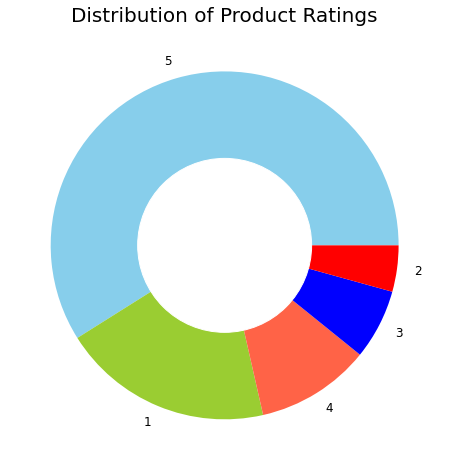

In [16]:
ratings = train["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0),0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Product Ratings", fontsize=20)
plt.show()

# Text Preprocessing

In [17]:
def remove_flag(text):
    emoji_pattern = re.compile(      
        u'([\U0001F1E6-\U0001F1FF])'     # emoticons
        "+", flags=re.UNICODE)
    return emoji_pattern.sub('', text)

In [18]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [19]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [20]:
from emot.emo_unicode import UNICODE_EMOJI 

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers, make emoji into words.'''
    
    text = remove_flag(text)
    text = remove_html(text)
    
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    text = text.lower()
    text = remove_urls(text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [21]:
train_clean = pd.DataFrame(train.Review.apply(round1))
test_clean = pd.DataFrame(test.Review.apply(round1))

In [22]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [23]:
train_clean = pd.DataFrame(train_clean.Review.apply(round2))
test_clean = pd.DataFrame(test_clean.Review.apply(round2))

In [24]:
train_clean

,Review
0,great game when i was a kid i grew up watching...
1,nice game
2,balo game but bholo laguchi khelibaku gote khu...
3,this is the worst computer cheating game ive e...
4,great
...,...
20995,افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996,very nice and enjoy
20997,it has lots of different games depending on yo...
20998,has several very frustrating bugs not present ...


In [25]:
test_clean

,Review
0,this used to be my favorite game and it is sti...
1,every single time i put the online multiplayer...
2,determined to make us watch ads wouldnt be an ...
3,super great running game
4,hello netease i really loved the game it deser...
...,...
6995,this is like playing real football
6996,please fix aim accuracy
6997,fix your game ranking and chat this game sucks...
6998,give coins


### Removal of StopWords

In [26]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [27]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [28]:
train_clean["Review"] = train_clean['Review'].apply(lambda text: remove_stopwords(text))
train_clean

,Review
0,great game kid grew watching pokémon buying po...
1,nice game
2,balo game bholo laguchi khelibaku gote khusi a...
3,worst computer cheating game ive ever played u...
4,great
...,...
20995,افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996,nice enjoy
20997,lots different games depending style also cust...
20998,several frustrating bugs present original bad ...


In [29]:
test_clean["Review"] = test_clean['Review'].apply(lambda text: remove_stopwords(text))
test_clean

,Review
0,used favorite game still grinningfacewithsweat
1,every single time put online multiplayer mode ...
2,determined make us watch ads wouldnt issue cho...
3,super great running game
4,hello netease really loved game deserve downlo...
...,...
6995,like playing real football
6996,please fix aim accuracy
6997,fix game ranking chat game sucks communication
6998,give coins


### Stemming and Lemmatization

In [30]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [31]:
train_clean["text_stemmed"] = train_clean['Review'].apply(lambda text: stem_words(text))
train_clean

,Review,text_stemmed
0,great game kid grew watching pokémon buying po...,great game kid grew watch pokémon buy pokemon ...
1,nice game,nice game
2,balo game bholo laguchi khelibaku gote khusi a...,balo game bholo laguchi khelibaku gote khusi a...
3,worst computer cheating game ive ever played u...,worst comput cheat game ive ever play unfortun...
4,great,great
...,...,...
20995,افضل لعبة و لكن اريد ان يكون شجرة الجواهر,افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996,nice enjoy,nice enjoy
20997,lots different games depending style also cust...,lot differ game depend style also custom chara...
20998,several frustrating bugs present original bad ...,sever frustrat bug present origin bad port sti...


In [32]:
test_clean["text_stemmed"] = test_clean['Review'].apply(lambda text: stem_words(text))
test_clean

,Review,text_stemmed
0,used favorite game still grinningfacewithsweat,use favorit game still grinningfacewithsweat
1,every single time put online multiplayer mode ...,everi singl time put onlin multiplay mode load...
2,determined make us watch ads wouldnt issue cho...,determin make us watch ad wouldnt issu choos g...
3,super great running game,super great run game
4,hello netease really loved game deserve downlo...,hello neteas realli love game deserv download ...
...,...,...
6995,like playing real football,like play real footbal
6996,please fix aim accuracy,pleas fix aim accuraci
6997,fix game ranking chat game sucks communication,fix game rank chat game suck commun
6998,give coins,give coin


In [33]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [34]:
train_clean["text_lemmatized"] = train_clean["Review"].apply(lambda text: lemmatize_words(text))
train_clean

,Review,text_stemmed,text_lemmatized
0,great game kid grew watching pokémon buying po...,great game kid grew watch pokémon buy pokemon ...,great game kid grow watch pokémon buying pokem...
1,nice game,nice game,nice game
2,balo game bholo laguchi khelibaku gote khusi a...,balo game bholo laguchi khelibaku gote khusi a...,balo game bholo laguchi khelibaku gote khusi a...
3,worst computer cheating game ive ever played u...,worst comput cheat game ive ever play unfortun...,worst computer cheat game ive ever play unfort...
4,great,great,great
...,...,...,...
20995,افضل لعبة و لكن اريد ان يكون شجرة الجواهر,افضل لعبة و لكن اريد ان يكون شجرة الجواهر,افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996,nice enjoy,nice enjoy,nice enjoy
20997,lots different games depending style also cust...,lot differ game depend style also custom chara...,lot different game depend style also customize...
20998,several frustrating bugs present original bad ...,sever frustrat bug present origin bad port sti...,several frustrate bug present original bad por...


In [35]:
test_clean["text_lemmatized"] = test_clean["Review"].apply(lambda text: lemmatize_words(text))
test_clean

,Review,text_stemmed,text_lemmatized
0,used favorite game still grinningfacewithsweat,use favorit game still grinningfacewithsweat,use favorite game still grinningfacewithsweat
1,every single time put online multiplayer mode ...,everi singl time put onlin multiplay mode load...,every single time put online multiplayer mode ...
2,determined make us watch ads wouldnt issue cho...,determin make us watch ad wouldnt issu choos g...,determine make u watch ad wouldnt issue choose...
3,super great running game,super great run game,super great running game
4,hello netease really loved game deserve downlo...,hello neteas realli love game deserv download ...,hello netease really loved game deserve downlo...
...,...,...,...
6995,like playing real football,like play real footbal,like play real football
6996,please fix aim accuracy,pleas fix aim accuraci,please fix aim accuracy
6997,fix game ranking chat game sucks communication,fix game rank chat game suck commun,fix game rank chat game suck communication
6998,give coins,give coin,give coin


# Model Training

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train_clean['text_lemmatized'], train['Rating'], test_size=0.2, random_state=30)

In [47]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.8) # stop words removal and max document frequency set to 0.7
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [48]:
# Training a Support Vector Machine classifier on the training data
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [49]:
# Predicting on the testing data
y_pred = clf.predict(X_test)

In [50]:
# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9297619047619048

# Predicting the Rating of Test data

In [42]:
test_data = tfidf.transform(test_clean['Review'])

In [43]:
pred = clf.predict(test_data)

In [44]:
pred

array([5, 1, 2, ..., 5, 5, 5])

In [45]:
sub1=pd.DataFrame()
sub1['Id']= [i for i in range(len(pred))]
sub1['Rating']=pred
sub1

,Id,Rating
0,0,5
1,1,1
2,2,2
3,3,5
4,4,3
...,...,...
6995,6995,5
6996,6996,3
6997,6997,5
6998,6998,5


In [53]:
sub1.to_csv('file.csv',index=False)